# Оценка судебных исков

In [19]:
import pandas as pd
import plotly.express as px
import numpy as np

In [20]:
df = pd.read_csv("data/Спортмастер_предобработка.csv")
df["date"] = pd.to_datetime(df["date"])
df["year"] =df["date"].dt.year 
df["month"] =df["date"].dt.month

In [21]:
df.head(2)

,name_court,url_court,plaintiff,respondent,name_company,url_case,date,path,name_pdf,is_apply,is_respondent,debt,is_win,court_value,year,month
0,09.06.2023\nА71-10108/2023,https://kad.arbitr.ru/Card/95275a4e-e588-4363-...,"ООО ""Спортмастер""",Управление Федеральной антимонопольной службы ...,Спортмастер,https://kad.arbitr.ru/Kad/PdfDocument/95275a4e...,2023-06-19,/home/proskurin_da3/Documents/scraping-lawsuit...,A71-10108-2023_20230619_Opredelenie.pdf,True,False,0.0,False,0.875,2023,6
1,12.05.2023\nА56-43426/2023,https://kad.arbitr.ru/Card/44de93de-4494-46fa-...,"ООО ""СПОРТМАСТЕР""","ООО ""Северо-Западная Рекламная Компания""",Спортмастер,https://kad.arbitr.ru/Kad/PdfDocument/44de93de...,2023-05-17,/home/proskurin_da3/Documents/scraping-lawsuit...,A56-43426-2023_20230517_Opredelenie.pdf,True,False,0.0,False,0.625,2023,5


In [22]:
df_group = df.groupby([df.year, df.month]).agg(
    {"debt": "sum", "url_case": "count", "is_respondent": "sum", "is_win": "sum","court_value":"mean"})
df_group = df_group.reset_index()
df_group["date"] = pd.to_datetime(df_group.year.astype(
    str) + '/' + df_group.month.astype(str) + '/01')
df_group = df_group[df_group["date"].dt.year >= 2022]
df_group.rename(columns={"url_case": "count"}, inplace=True)


In [23]:
AuthC = float(261_600_000)  # Уставной капитал "Ростикс"
AsC = float(80_300_000_000)  # Активы
df_group["a1"] = (df_group["debt"]/AuthC + df_group["debt"]/AsC)
df_group.replace([np.inf, -np.inf], 0, inplace=True)
df_group

,year,month,debt,count,is_respondent,is_win,court_value,date,a1
41,2022,1,5.012926e+07,24,4,0,0.593750,2022-01-01,0.192250
42,2022,2,0.000000e+00,7,0,0,0.660714,2022-02-01,0.000000
43,2022,3,2.054548e+08,20,4,0,0.562500,2022-03-01,0.787936
44,2022,4,1.911179e+08,20,5,0,0.518750,2022-04-01,0.732953
45,2022,5,3.511367e+08,25,6,0,0.555000,2022-05-01,1.346638
46,2022,6,3.512952e+08,27,9,0,0.476852,2022-06-01,1.347246
47,2022,7,7.593295e+07,15,5,0,0.450000,2022-07-01,0.291209
48,2022,8,3.965687e+08,25,9,0,0.445000,2022-08-01,1.520874
49,2022,9,2.075988e+08,24,6,0,0.541667,2022-09-01,0.796159
50,2022,10,7.551063e+07,19,6,0,0.493421,2022-10-01,0.289590


In [24]:
a_2 = []
for _, row in df_group.iterrows():
    tmp_dict = row.to_dict()
    tmp_date = tmp_dict["date"]
    tmp_df = df_group[df_group["date"]<=tmp_date]
    tmp_a2 = tmp_df["count"].mean() / tmp_df["count"].std()
    a_2.append(tmp_a2)
df_group["a2"] = a_2
df_group.replace([np.inf, -np.inf,np.nan], 3.33, inplace=True)

In [25]:
df_group

,year,month,debt,count,is_respondent,is_win,court_value,date,a1,a2
41,2022,1,5.012926e+07,24,4,0,0.593750,2022-01-01,0.192250,3.330000
42,2022,2,0.000000e+00,7,0,0,0.660714,2022-02-01,0.000000,1.289430
43,2022,3,2.054548e+08,20,4,0,0.562500,2022-03-01,0.787936,1.912649
44,2022,4,1.911179e+08,20,5,0,0.518750,2022-04-01,0.732953,2.395225
45,2022,5,3.511367e+08,25,6,0,0.555000,2022-05-01,1.346638,2.670275
46,2022,6,3.512952e+08,27,9,0,0.476852,2022-06-01,1.347246,2.856605
47,2022,7,7.593295e+07,15,5,0,0.450000,2022-07-01,0.291209,2.868368
48,2022,8,3.965687e+08,25,9,0,0.445000,2022-08-01,1.520874,3.072270
49,2022,9,2.075988e+08,24,6,0,0.541667,2022-09-01,0.796159,3.287539
50,2022,10,7.551063e+07,19,6,0,0.493421,2022-10-01,0.289590,3.441842


In [26]:
a_3 = []
for _, row in df_group.iterrows():
    tmp_dict = row.to_dict()
    tmp_date = tmp_dict["date"]
    tmp_df = df_group[df_group["date"] <= tmp_date]
    tmp_a3 = tmp_df["is_respondent"].sum()/tmp_df["count"].sum()
    a_3.append(tmp_a3)
df_group["a3"] = a_3
df_group.replace([np.inf, -np.inf, np.nan], 3.33, inplace=True)


In [27]:
df_group

,year,month,debt,count,is_respondent,is_win,court_value,date,a1,a2,a3
41,2022,1,5.012926e+07,24,4,0,0.593750,2022-01-01,0.192250,3.330000,0.166667
42,2022,2,0.000000e+00,7,0,0,0.660714,2022-02-01,0.000000,1.289430,0.129032
43,2022,3,2.054548e+08,20,4,0,0.562500,2022-03-01,0.787936,1.912649,0.156863
44,2022,4,1.911179e+08,20,5,0,0.518750,2022-04-01,0.732953,2.395225,0.183099
45,2022,5,3.511367e+08,25,6,0,0.555000,2022-05-01,1.346638,2.670275,0.197917
46,2022,6,3.512952e+08,27,9,0,0.476852,2022-06-01,1.347246,2.856605,0.227642
47,2022,7,7.593295e+07,15,5,0,0.450000,2022-07-01,0.291209,2.868368,0.239130
48,2022,8,3.965687e+08,25,9,0,0.445000,2022-08-01,1.520874,3.072270,0.257669
49,2022,9,2.075988e+08,24,6,0,0.541667,2022-09-01,0.796159,3.287539,0.256684
50,2022,10,7.551063e+07,19,6,0,0.493421,2022-10-01,0.289590,3.441842,0.262136


In [28]:
a_4 = []
for _, row in df_group.iterrows():
    tmp_dict = row.to_dict()
    tmp_date = tmp_dict["date"]
    tmp_df = df_group[df_group["date"] <= tmp_date]
    tmp_a4 = tmp_df["is_win"].sum()/tmp_df["count"].sum()
    a_4.append(tmp_a4)
df_group["a4"] = a_4
df_group.replace([np.inf, -np.inf, np.nan], 3.33, inplace=True)

In [29]:
df_group

,year,month,debt,count,is_respondent,is_win,court_value,date,a1,a2,a3,a4
41,2022,1,5.012926e+07,24,4,0,0.593750,2022-01-01,0.192250,3.330000,0.166667,0.0
42,2022,2,0.000000e+00,7,0,0,0.660714,2022-02-01,0.000000,1.289430,0.129032,0.0
43,2022,3,2.054548e+08,20,4,0,0.562500,2022-03-01,0.787936,1.912649,0.156863,0.0
44,2022,4,1.911179e+08,20,5,0,0.518750,2022-04-01,0.732953,2.395225,0.183099,0.0
45,2022,5,3.511367e+08,25,6,0,0.555000,2022-05-01,1.346638,2.670275,0.197917,0.0
46,2022,6,3.512952e+08,27,9,0,0.476852,2022-06-01,1.347246,2.856605,0.227642,0.0
47,2022,7,7.593295e+07,15,5,0,0.450000,2022-07-01,0.291209,2.868368,0.239130,0.0
48,2022,8,3.965687e+08,25,9,0,0.445000,2022-08-01,1.520874,3.072270,0.257669,0.0
49,2022,9,2.075988e+08,24,6,0,0.541667,2022-09-01,0.796159,3.287539,0.256684,0.0
50,2022,10,7.551063e+07,19,6,0,0.493421,2022-10-01,0.289590,3.441842,0.262136,0.0


In [30]:
df_group["a5"] = df_group["court_value"].copy()
df_group

,year,month,debt,count,is_respondent,is_win,court_value,date,a1,a2,a3,a4,a5
41,2022,1,5.012926e+07,24,4,0,0.593750,2022-01-01,0.192250,3.330000,0.166667,0.0,0.593750
42,2022,2,0.000000e+00,7,0,0,0.660714,2022-02-01,0.000000,1.289430,0.129032,0.0,0.660714
43,2022,3,2.054548e+08,20,4,0,0.562500,2022-03-01,0.787936,1.912649,0.156863,0.0,0.562500
44,2022,4,1.911179e+08,20,5,0,0.518750,2022-04-01,0.732953,2.395225,0.183099,0.0,0.518750
45,2022,5,3.511367e+08,25,6,0,0.555000,2022-05-01,1.346638,2.670275,0.197917,0.0,0.555000
46,2022,6,3.512952e+08,27,9,0,0.476852,2022-06-01,1.347246,2.856605,0.227642,0.0,0.476852
47,2022,7,7.593295e+07,15,5,0,0.450000,2022-07-01,0.291209,2.868368,0.239130,0.0,0.450000
48,2022,8,3.965687e+08,25,9,0,0.445000,2022-08-01,1.520874,3.072270,0.257669,0.0,0.445000
49,2022,9,2.075988e+08,24,6,0,0.541667,2022-09-01,0.796159,3.287539,0.256684,0.0,0.541667
50,2022,10,7.551063e+07,19,6,0,0.493421,2022-10-01,0.289590,3.441842,0.262136,0.0,0.493421


In [31]:
w1=w2=w3=w4=w5=1
df_group['grade'] = np.sqrt(w1*(df_group['a1']**2)+w2*(df_group['a2']**2)+w3 *
                      (df_group['a3']**2)+w4*(df_group['a4']**2)+w5*(df_group['a5']**2))
df_group

,year,month,debt,count,is_respondent,is_win,court_value,date,a1,a2,a3,a4,a5,grade
41,2022,1,5.012926e+07,24,4,0,0.593750,2022-01-01,0.192250,3.330000,0.166667,0.0,0.593750,3.392076
42,2022,2,0.000000e+00,7,0,0,0.660714,2022-02-01,0.000000,1.289430,0.129032,0.0,0.660714,1.454587
43,2022,3,2.054548e+08,20,4,0,0.562500,2022-03-01,0.787936,1.912649,0.156863,0.0,0.562500,2.149438
44,2022,4,1.911179e+08,20,5,0,0.518750,2022-04-01,0.732953,2.395225,0.183099,0.0,0.518750,2.564556
45,2022,5,3.511367e+08,25,6,0,0.555000,2022-05-01,1.346638,2.670275,0.197917,0.0,0.555000,3.048114
46,2022,6,3.512952e+08,27,9,0,0.476852,2022-06-01,1.347246,2.856605,0.227642,0.0,0.476852,3.202261
47,2022,7,7.593295e+07,15,5,0,0.450000,2022-07-01,0.291209,2.868368,0.239130,0.0,0.450000,2.927801
48,2022,8,3.965687e+08,25,9,0,0.445000,2022-08-01,1.520874,3.072270,0.257669,0.0,0.445000,3.466456
49,2022,9,2.075988e+08,24,6,0,0.541667,2022-09-01,0.796159,3.287539,0.256684,0.0,0.541667,3.435269
50,2022,10,7.551063e+07,19,6,0,0.493421,2022-10-01,0.289590,3.441842,0.262136,0.0,0.493421,3.498903


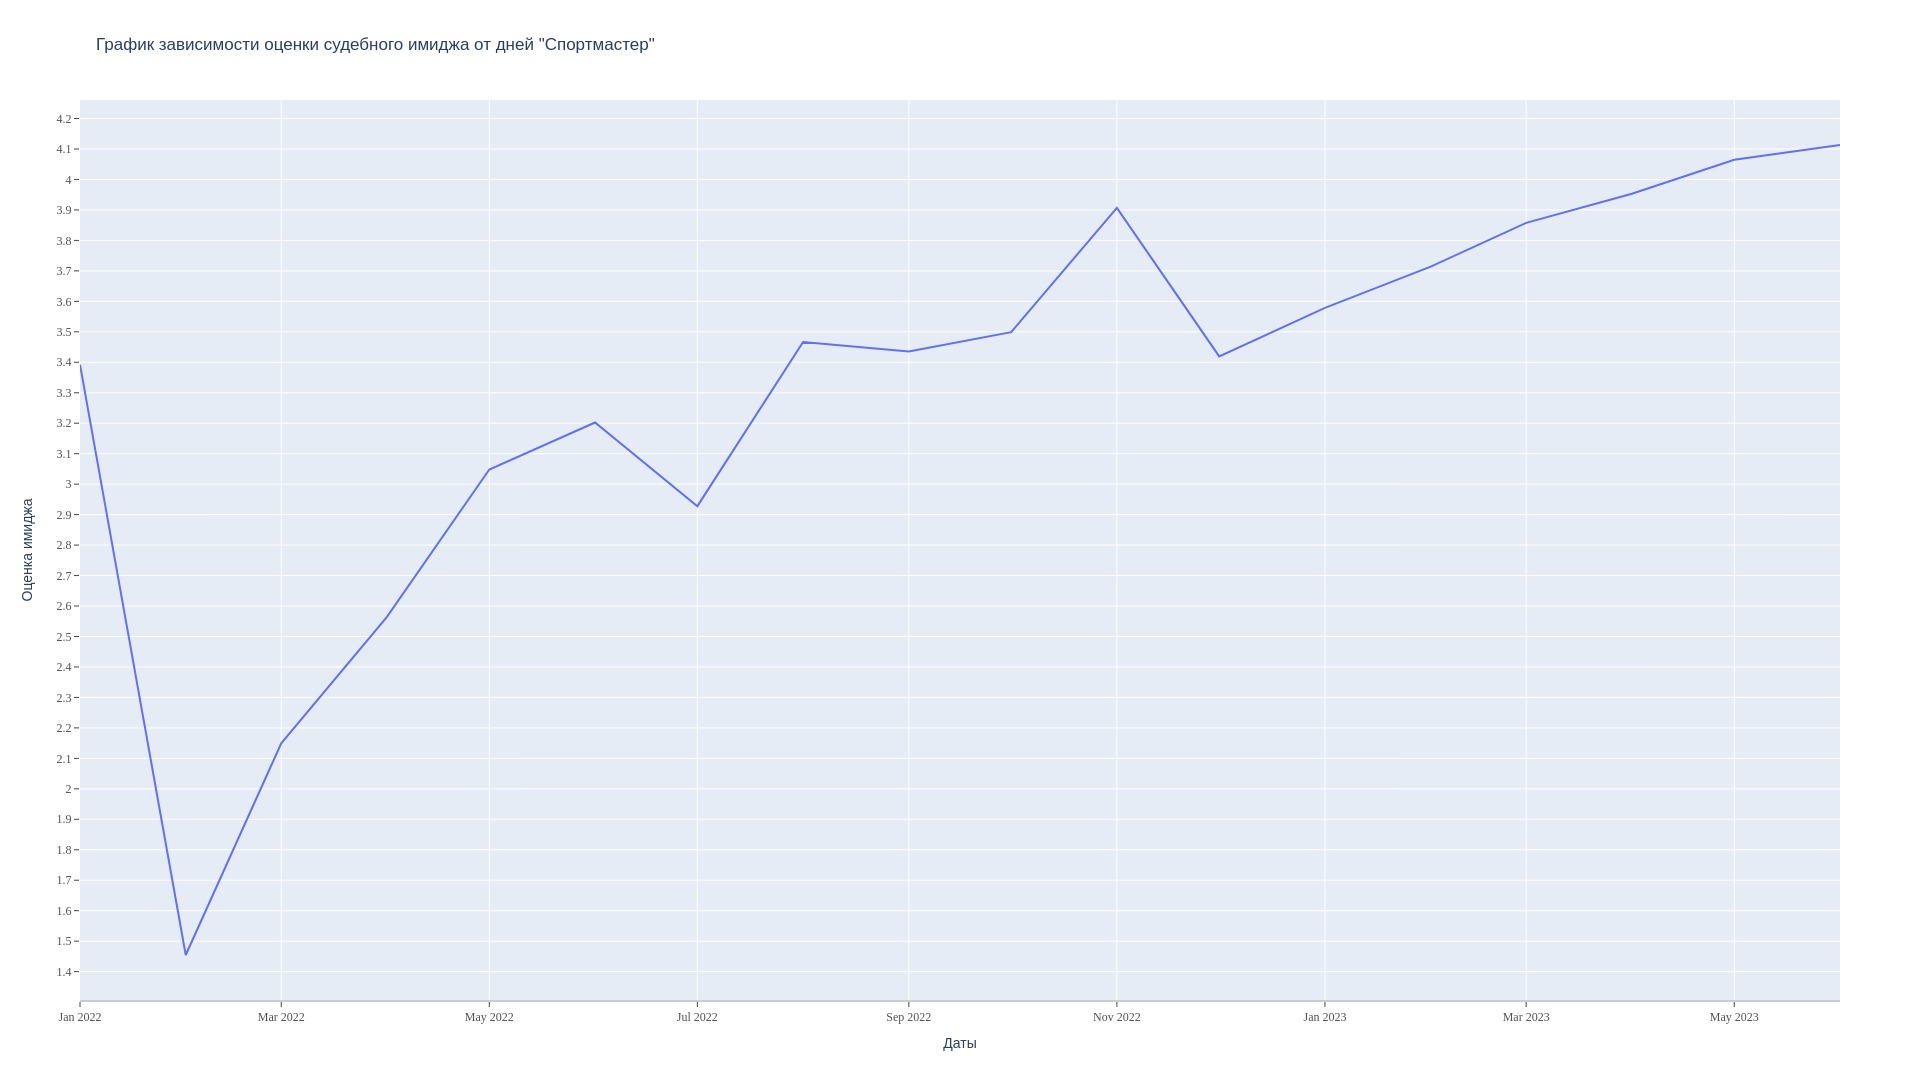

In [33]:
fig = px.line(df_group, x="date", y="grade",
              title='График зависимости оценки судебного имиджа от дней \"Спортмастер\"')
fig.update_layout(xaxis_title='Даты', yaxis_title='Оценка имиджа',  xaxis=dict(
    showticklabels=True,
    linecolor='rgb(204, 204, 204)',
    linewidth=2,
    ticks='outside',
    tickfont=dict(
        family='Times New Roman',
        size=12,
        color='rgb(82, 82, 82)',
    )),
    yaxis=dict(
    ticks='outside',
    tickmode='linear',
    tick0=0,
    dtick=0.1,
    tickfont=dict(
        family='Times New Roman',
        size=12,
        color='rgb(82, 82, 82)',
    )))
fig.show("jpeg",width=1920,height=1080)
